
## Part I - WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In this example, you'll be creating a Python script to visualise the weather of 500+ cities across the world of varying distance from the equator. To accomplish this, you'll be utilising a [simple Python library](https://pypi.python.org/pypi/citipy), the [OpenWeatherMap API](https://openweathermap.org/api), and a little common sense to create a representative model of weather across world cities.

Your first requirement is to create a series of scatter plots to showcase the following relationships:

* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

After each plot add a sentence or two explaining what the code is and analysing.

Your second requirement is to run linear regression on each relationship, only this time separating them into Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude):

* Northern Hemisphere - Temperature (F) vs. Latitude
* Southern Hemisphere - Temperature (F) vs. Latitude
* Northern Hemisphere - Humidity (%) vs. Latitude
* Southern Hemisphere - Humidity (%) vs. Latitude
* Northern Hemisphere - Cloudiness (%) vs. Latitude
* Southern Hemisphere - Cloudiness (%) vs. Latitude
* Northern Hemisphere - Wind Speed (mph) vs. Latitude
* Southern Hemisphere - Wind Speed (mph) vs. Latitude

After each pair of plots explain what the linear regression is modelling such as any relationships you notice and any other analysis you may have.

Your final notebook must:

* Randomly select **at least** 500 unique (non-repeat) cities based on latitude and longitude.
* Perform a weather check on each of the cities using a series of successive API calls.
* Include a print log of each city as it's being processed with the city number and city name.
* Save a CSV of all retrieved data and a PNG image for each scatter plot.

##For Part I, you must include a written description of three observable trends based on the data.

1. City Latitude vs. Max Temperature plot shows the relationship between latitude and temperature. 
It shows that the closer you are to the equator (latitude 0), the temperature gets hotter. Conversely, at higher latitudes the max temparature drops.

2. City Latitude vs. Humidity plot shows the relationship between latitude and humidity. 
Based on this chart we can infer that there is no direct correlation between latitude and humidity.

3. City Latitude vs. Cloudiness plot shows that there's a random relationship between latitude and cloudiness.

4. City Latitude vs. Wind Speed plot shows the relationship between latitude and wind speed. The wind speeds are greater as you move farther away from equator (latitude 0).


In [26]:
# Importing base libraries
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from scipy import stats
from datetime import date

# Importing libraries needed for API requests
import json
import requests

# Importing random library for randomizing longitudes
import random

# Importing library which returns the nearest city for given (latitude, longitude)
from citipy import citipy

# Output File (CSV)
output_data = "Data/city_weather.csv"

# API key
from api_keys import api_key

## Generate Cities List

In [2]:
# Range of latitudes and longitudes  
lat_range = (-90, 90)
lng_range = (-180, 180)

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Randomly select at least 500 unique (non-repeat) cities based on latitude and longitude.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)


# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

603

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Pass the url and create empty lists to store the data for each field

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={api_key}&units={units}&q="

city_name_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1

test_response = requests.get(query_url + "London").json()
test_response

{'coord': {'lon': -0.1257, 'lat': 51.5085},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03d'}],
 'base': 'stations',
 'main': {'temp': 71.98,
  'feels_like': 71.83,
  'temp_min': 68.34,
  'temp_max': 75.25,
  'pressure': 1018,
  'humidity': 63},
 'visibility': 10000,
 'wind': {'speed': 1.01, 'deg': 265, 'gust': 8.01},
 'clouds': {'all': 42},
 'dt': 1631797696,
 'sys': {'type': 2,
  'id': 2019646,
  'country': 'GB',
  'sunrise': 1631770630,
  'sunset': 1631816023},
 'timezone': 3600,
 'id': 2643743,
 'name': 'London',
 'cod': 200}

In [4]:
print("Beginning Data Retrieval ")
print("-----------------------------")

# For each city name in cities list, do below things...
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 : bredasdorp
Processing Record 2 of Set 1 : atuona
Processing Record 3 of Set 1 : kashmor
Processing Record 4 of Set 1 : vaini
Processing Record 5 of Set 1 : kothi
Processing Record 6 of Set 1 : sao filipe
Processing Record 7 of Set 1 : zhigansk
Processing Record 8 of Set 1 : muchkapskiy
Processing Record 9 of Set 1 : soe
Processing Record 10 of Set 1 : camopi
City not found. Skipping...
Processing Record 11 of Set 1 : rikitea
Processing Record 12 of Set 1 : torbay
Processing Record 13 of Set 1 : willowmore
Processing Record 14 of Set 1 : khasan
Processing Record 15 of Set 1 : chokurdakh
Processing Record 16 of Set 1 : bodden town
Processing Record 17 of Set 1 : clyde river
Processing Record 18 of Set 1 : lagoa
Processing Record 19 of Set 1 : hithadhoo
Processing Record 20 of Set 1 : udon thani
Processing Record 21 of Set 1 : faanui
Processing Record 22 of Set 1 : punta arenas
Processing Record 23 of S

Processing Record 36 of Set 4 : alyangula
City not found. Skipping...
Processing Record 37 of Set 4 : sao joao da barra
Processing Record 38 of Set 4 : kodiak
Processing Record 39 of Set 4 : marovoay
Processing Record 40 of Set 4 : caravelas
Processing Record 41 of Set 4 : fort morgan
Processing Record 42 of Set 4 : pouembout
Processing Record 43 of Set 4 : homer
Processing Record 44 of Set 4 : andornaktalya
Processing Record 45 of Set 4 : chiang khong
Processing Record 46 of Set 4 : aras
Processing Record 47 of Set 4 : vanavara
Processing Record 48 of Set 4 : richards bay
Processing Record 49 of Set 4 : semey
Processing Record 50 of Set 4 : dongsheng
City not found. Skipping...
City not found. Skipping...
Processing Record 0 of Set 5 : dali
Processing Record 1 of Set 5 : muros
Processing Record 2 of Set 5 : nizwa
Processing Record 3 of Set 5 : saint george
Processing Record 4 of Set 5 : mizan teferi
Processing Record 5 of Set 5 : astoria
City not found. Skipping...
City not found. Ski

Processing Record 17 of Set 8 : marawi
Processing Record 18 of Set 8 : makakilo city
Processing Record 19 of Set 8 : chaumont
City not found. Skipping...
Processing Record 20 of Set 8 : buenos aires
Processing Record 21 of Set 8 : makaryev
Processing Record 22 of Set 8 : jizan
Processing Record 23 of Set 8 : saint-augustin
Processing Record 24 of Set 8 : veraval
Processing Record 25 of Set 8 : alvorada
Processing Record 26 of Set 8 : lingao
Processing Record 27 of Set 8 : dudinka
Processing Record 28 of Set 8 : vuktyl
Processing Record 29 of Set 8 : carballo
Processing Record 30 of Set 8 : consuelo
Processing Record 31 of Set 8 : moron
Processing Record 32 of Set 8 : pangnirtung
City not found. Skipping...
Processing Record 33 of Set 8 : atasu
Processing Record 34 of Set 8 : rongcheng
Processing Record 35 of Set 8 : natitingou
Processing Record 36 of Set 8 : vila
Processing Record 37 of Set 8 : thinadhoo
Processing Record 38 of Set 8 : lyuban
Processing Record 39 of Set 8 : meadow lake

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Create a panda data frame to Convert Raw city and weather Data to DataFrame
weather_dict_rawdata = pd.DataFrame({ 
                "City" : city_name_list,
                "Lat" : lat_list,
                "Lng" : lng_list,
                "Max Temp" : max_temp_list,
                "Humidity" : humidity_list,
                "Cloudiness" : cloudiness_list,
                "Wind Speed" : wind_speed_list,
                "Country" : country_list,
                "Date" : date_list
})

In [6]:
# Display the Data Frame
weather_dict_rawdata.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bredasdorp,-34.5322,20.0403,62.28,58,92,6.67,ZA,1631797706
1,Atuona,-9.8000,-139.0333,77.07,76,8,17.00,PF,1631797708
2,Kashmor,28.4333,69.5833,105.40,23,7,3.56,PK,1631797709
3,Vaini,-21.2000,-175.2000,73.56,100,20,5.75,TO,1631797650
4,Kothi,24.7500,80.7833,77.05,92,100,12.06,IN,1631797710


In [7]:
# Save city data into a csv file
weather_dict_rawdata.to_csv("Data/City_Weather.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
humidity_filter=weather_dict_rawdata['Humidity']>100
weather_dict=weather_dict_rawdata[~humidity_filter]
weather_dict_skip=weather_dict_rawdata[humidity_filter]

len(weather_dict_skip)

0

In [9]:
#  Get the indices of cities that have humidity over 100%.
indices = [i for i, x in enumerate(humidity_filter) if x == True]
indices

[]

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [11]:
# Get current date of analysis     
curr_date = pd.to_datetime('today').date().strftime("%d/%m/%Y")
curr_date

'16/09/2021'

## Latitude vs. Temperature Plot

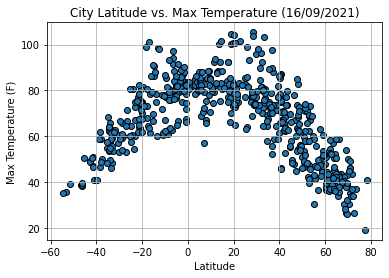

In [12]:
# Create a scatter plot based on new dataframe above (weather data frame )
plt.scatter(weather_dict['Lat'], weather_dict['Max Temp'], marker = "o", edgecolor='black')

# Add labels and title to plot
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title('City Latitude vs. Max Temperature (' + curr_date +')')
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.savefig("Data/City Latitude vs. Max Temperature.png")

# Display plot
plt.show()

City Latitude vs. Max Temperature plot shows the relationship between latitude and temperature. 
It shows that the closer you are to the equator (latitude 0), the temperature gets hotter. Conversely, at higher latitudes the max temparature drops.

## Latitude vs. Humidity Plot

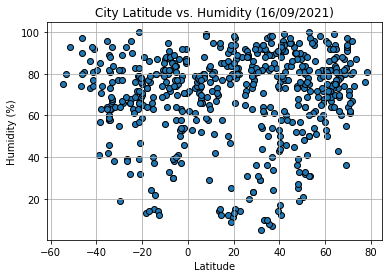

In [13]:
# Create a scatter plot based on new dataframe above (weather data frame )
plt.scatter(weather_dict['Lat'], weather_dict['Humidity'], marker = "o", edgecolor='black')

# Add labels and title to plot
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title('City Latitude vs. Humidity (' + curr_date +')')
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.savefig("Data/City Latitude vs. Humidity.png")

# Display plot
plt.show()

City Latitude vs. Humidity plot shows the relationship between latitude and humidity. 
Based on this chart we can infer that there is no direct correlation between latitude and humidity.

## Latitude vs. Cloudiness Plot

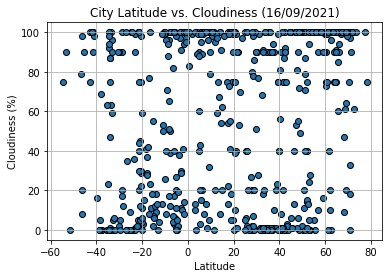

In [14]:
# Create a scatter plot based on new dataframe above (weather data frame )
plt.scatter(weather_dict['Lat'], weather_dict['Cloudiness'], marker = "o", edgecolor='black')

# Add labels and title to plot
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title('City Latitude vs. Cloudiness (' + curr_date +')')
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.savefig("Data/City Latitude vs. Cloudiness.png")

# Display plot
plt.show()

City Latitude vs. Cloudiness plot shows that there's a random relationship between latitude and cloudiness.

## Latitude vs. Wind Speed Plot

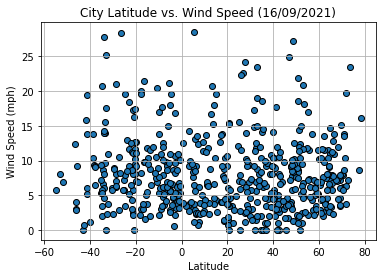

In [15]:
# Create a scatter plot based on new dataframe above (weather data frame )
plt.scatter(weather_dict['Lat'], weather_dict['Wind Speed'], marker = "o", edgecolor='black')

# Add labels and title to plot
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title('City Latitude vs. Wind Speed (' + curr_date +')')
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.savefig("Data/City Latitude vs. Wind Speed.png")

# Display plot
plt.show()


City Latitude vs. Wind Speed plot shows the relationship between latitude and wind speed. 
The wind speeds are greater as you move farther away from equator (latitude 0). 

## Linear Regression

In [27]:
# Create Northern and Southern Hemisphere DataFrames based on equator (greater than or equal to 0 degrees latitude) 
above_equator = weather_dict['Lat'] >= 0
northern_hemisphere = weather_dict[above_equator]
southern_hemisphere = weather_dict[~above_equator]

southern_hemisphere.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bredasdorp,-34.5322,20.0403,62.28,58,92,6.67,ZA,1631797706
1,Atuona,-9.8000,-139.0333,77.07,76,8,17.00,PF,1631797708
3,Vaini,-21.2000,-175.2000,73.56,100,20,5.75,TO,1631797650
8,Soe,-9.8607,124.2840,67.23,87,99,5.32,ID,1631797714
10,Rikitea,-23.1203,-134.9692,72.79,76,1,11.59,PF,1631797648


In [17]:
# Define plotting function to input X axis and Y axis.

def plot_Linear_Regression(xdata,ydata,xlabel,ylabel):
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(xdata, ydata)
    print(f"The r-value is: {rvalue}")
    regress_values = xdata * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(xdata,ydata)
    plt.plot(xdata,regress_values,"r-")
    plt.annotate(line_eq,(10,20),fontsize=12,color="red")
    plt.grid()
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8113061797865163


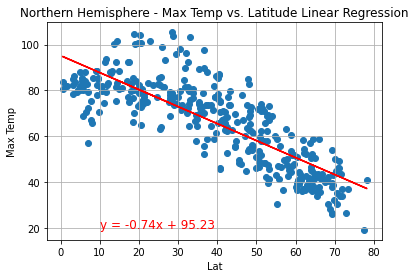

In [18]:
# Northern Hemisphere - Max Temp vs. Latitude Linear Regression
xlabel = "Lat"
ylabel = "Max Temp"
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.savefig("Data/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
plot_Linear_Regression(northern_hemisphere[xlabel],northern_hemisphere[ylabel],xlabel,ylabel)

Northern Hemisphere - Max Temp vs. Latitude Linear Regression shows that there is negative linear relationship between Max Temp and Latitude in the Northern Hemisphere. When latitude increases, temperature decreases hence a negative linear relationship exists.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7974222041784423


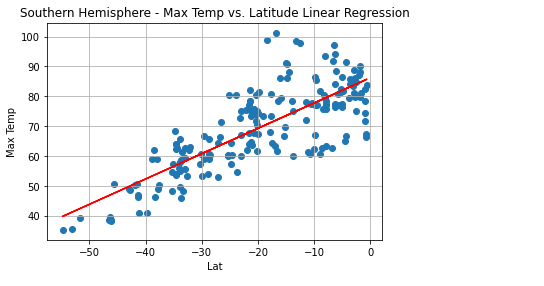

In [19]:
# Southern Hemisphere - Max Temp vs. Latitude Linear Regression
xlabel = "Lat"
ylabel = "Max Temp"
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.savefig("Data/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
plot_Linear_Regression(southern_hemisphere[xlabel],southern_hemisphere[ylabel],xlabel,ylabel)

Southern Hemisphere - Max Temp vs. Latitude Linear Regression shows that there is positive linear relationship between Max Temp and Latitude in the Southern Hemisphere. When latitude increases, temperature also increases hence a positive linear relationship exists.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.0998394955453538


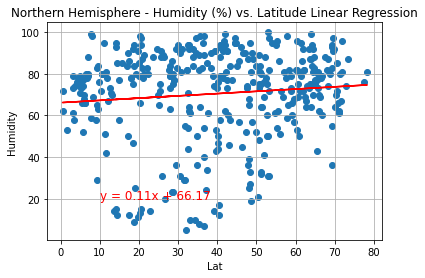

In [20]:
# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
xlabel = "Lat"
ylabel = "Humidity"
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.savefig("Data/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")
plot_Linear_Regression(northern_hemisphere[xlabel],northern_hemisphere[ylabel],xlabel,ylabel)

Northern Hemisphere - Humidity vs. Latitude Linear Regression plot shows that when latitude increases, Humidity slightly increases hence not a very strong linear relationship exists.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: -0.10466042048826057


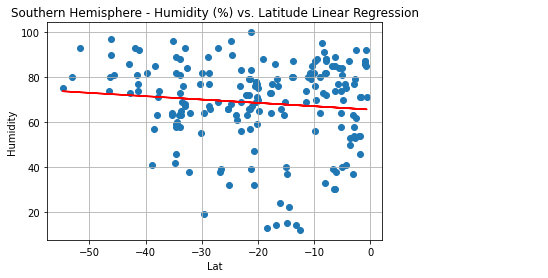

In [21]:
# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
xlabel = "Lat"
ylabel = "Humidity"
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.savefig("Data/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")
plot_Linear_Regression(southern_hemisphere[xlabel],southern_hemisphere[ylabel],xlabel,ylabel)

Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression shows that as you move away from the equator (latitude 0) humidity slightly increases.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.14356316309815442


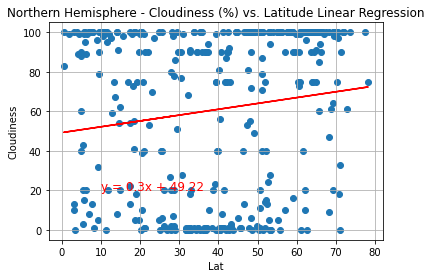

In [22]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
xlabel = "Lat"
ylabel = "Cloudiness"
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.savefig("Data/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")
plot_Linear_Regression(northern_hemisphere[xlabel],northern_hemisphere[ylabel],xlabel,ylabel)

Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression plot shows that there is a positive correlation between Cloudiness and Latitude in the Northern Hemisphere.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.048258598035229416


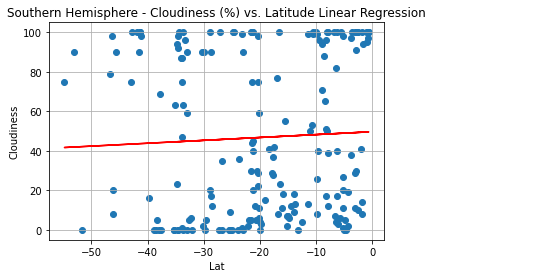

In [23]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
xlabel = "Lat"
ylabel = "Cloudiness"
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.savefig("Data/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")
plot_Linear_Regression(southern_hemisphere[xlabel],southern_hemisphere[ylabel],xlabel,ylabel)

Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression plot shows that there is a slight positive correlation between Cloudiness and Latitude in the Southern Hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.03962807849782123


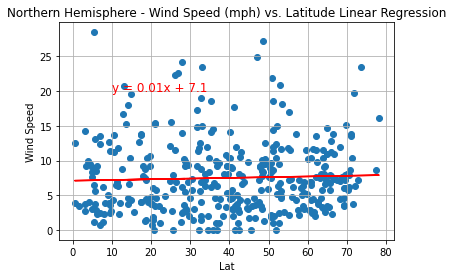

In [24]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
xlabel = "Lat"
ylabel = "Wind Speed"
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.savefig("Data/Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")
plot_Linear_Regression(northern_hemisphere[xlabel],northern_hemisphere[ylabel],xlabel,ylabel)

Northern Hemisphere - Wind Speed vs. Latitude Linear Regression plot shows that there is a slight positive correlation between Wind Speed and Latitude in the Northern Hemisphere.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.06260365110664397


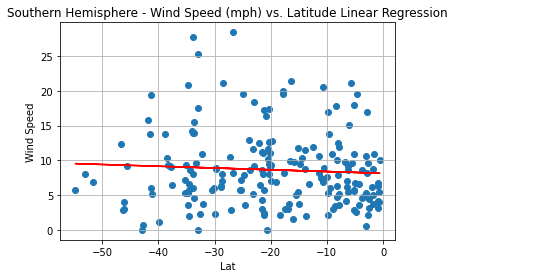

In [25]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
xlabel = "Lat"
ylabel = "Wind Speed"
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.savefig("Data/Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")
plot_Linear_Regression(southern_hemisphere[xlabel],southern_hemisphere[ylabel],xlabel,ylabel)

Southern Hemisphere - Wind Speed vs. Latitude Linear Regression plot shows that there is a slight negative correlation between Wind Speed and Latitude in the Southern Hemisphere.